<a href="https://colab.research.google.com/github/1Nine2/RIIAA-Hackathon-2021-Justice-for-the-disappeared/blob/main/JusticIA_AccesoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
from os import scandir, getcwd
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import sklearn
import scipy
import math
import  PIL
import imutils
#import easyocr

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## 2. Leer la lista de archivos

EL conjunto de datos incluye un csv `JusticIA_DatosTranscripciones.csv` con los archivos, el texto transcrito y varios metadatos.

Nota: si cambias el lugar donde se encuentra el link a la carpeta de los datos será necesario que actualices los paths.

In [ ]:
import pandas as pd

in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/'

in_file = 'JusticIA_DatosTranscripciones.csv'

df = pd.read_csv(in_dir+in_file)
df.tail()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-92220658b398>", line 7, in <module>
    df = pd.read_csv(in_dir+in_file)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 1180, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 2010, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "pa

OSError: ignored

In [ ]:
#in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/'
in_dir= 'drive/MyDrive/Datos - Hackathon JusticIA/Expedientes'
from os import scandir, getcwd
from os.path import abspath
import os

def ls(ruta = getcwd()):
    return [abspath(arch.path) for arch in scandir(ruta) if arch.is_file()]
lista=ls(in_dir)
print(len(lista))

FileNotFoundError: ignored

In [ ]:
os.chdir(r'drive/MyDrive/Datos - Hackathon JusticIA/Expedientes')

fileList = [x for x in os.listdir() if 'jpg'  in x.lower()]
fileList[:5]

FileNotFoundError: ignored

# 3. Ejecutar una función en todos los archivos

Una opción es recorrer las carpetas de archivos usando glob. En este caso imprimiremos el ancho y largo de 20 archivos al azar.

the_biggest_component: 16989
average: 84.50686184812443
a4_small_size_outliar_constant: 351.50851740513224
a4_big_size_outliar_constant: 6327.1533132923805


OSError: ignored

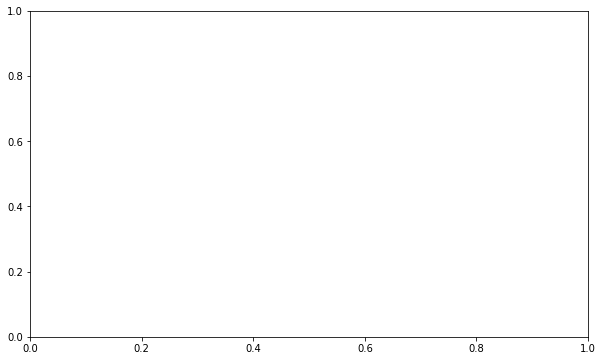

In [ ]:
fileList = fileList[:5]

path = "/content/drive/MyDrive/Datos - Hackathon JusticIA/Expedientes"

#test_img_file = os.path.join (path, lista[4])
#test_img = Image.open(test_img_file)
#plt.imshow(test_img)
#print(type(lista[1]))

#print(type(img))
i=0
for test in fileList:
      test_img_file = os.path.join (path, test)

              # the parameters are used to remove small size connected pixels outliar
      constant_parameter_1 = 84
      constant_parameter_2 = 250
      constant_parameter_3 = 100

      # the parameter is used to remove big size connected pixels outliar
      constant_parameter_4 = 18

      # read the input image
      img = cv2.imread(test_img_file, 0)
      img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

      # connected component analysis by scikit-learn framework
      blobs = img > img.mean()
      blobs_labels = measure.label(blobs, background=1)
      image_label_overlay = label2rgb(blobs_labels, image=img)

      fig, ax = plt.subplots(figsize=(10, 6))

      '''
      # plot the connected components (for debugging)
      ax.imshow(image_label_overlay)
      ax.set_axis_off()
      plt.tight_layout()
      plt.show()
      '''

      the_biggest_component = 0
      total_area = 0
      counter = 0
      average = 0.0
      for region in regionprops(blobs_labels):
          if (region.area > 10):
              total_area = total_area + region.area
              counter = counter + 1
          # print region.area # (for debugging)
          # take regions with large enough areas
          if (region.area >= 250):
              if (region.area > the_biggest_component):
                  the_biggest_component = region.area

      average = (total_area/counter)
      print("the_biggest_component: " + str(the_biggest_component))
      print("average: " + str(average))

      # experimental-based ratio calculation, modify it for your cases
      # a4_small_size_outliar_constant is used as a threshold value to remove connected outliar connected pixels
      # are smaller than a4_small_size_outliar_constant for A4 size scanned documents
      a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
      print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))

      # experimental-based ratio calculation, modify it for your cases
      # a4_big_size_outliar_constant is used as a threshold value to remove outliar connected pixels
      # are bigger than a4_big_size_outliar_constant for A4 size scanned documents
      a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
      print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))

      # remove the connected pixels are smaller than a4_small_size_outliar_constant
      pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
      # remove the connected pixels are bigger than threshold a4_big_size_outliar_constant
      # to get rid of undesired connected pixels such as table headers and etc.
      component_sizes = np.bincount(pre_version.ravel())
      too_small = component_sizes > (a4_big_size_outliar_constant)
      too_small_mask = too_small[pre_version]
      pre_version[too_small_mask] = 0
      # save the the pre-version which is the image is labelled with colors
      # as considering connected components
      plt.imsave( "pre.png", pre_version)

      # read the pre-version
      img = cv2.imread("pre.png", 0)
      # ensure binary
      img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
      # save the the result
      cv2.imwrite("File" + str(i) + ".png",img)
      i = i + 1



10


True

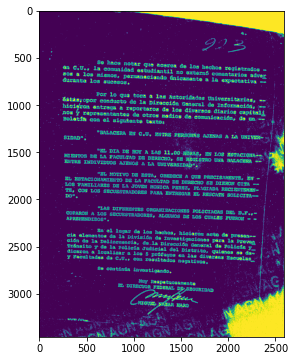

In [ ]:
#test_img_file = os.path.join (path, "AGN_DFS_C.184_Tecla_Parra_Artemisa_pg-007.jpg")
test_img = Image.open('agn_.jpg')
#plt.imshow(test_img)
#model
# los parámetros se utilizan para eliminar los píxeles conectados de pequeño tamaño outliar
constant_parameter_1 = 84
constant_parameter_2 = 250
constant_parameter_3 = 100
# el parámetro se utiliza para eliminar los píxeles conectados de gran tamaño outliar
constant_parameter_4 = 18
img = cv2.imread('agn_.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
# análisis de componentes conectados mediante el marco scikit-learn
blobs =img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)
fig, ax = plt.subplots(figsize=(10, 6))

the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
  if (region.area > 10):
      total_area = total_area + region.area
      counter = counter + 1
  if (region.area >= 250):
     if (region.area > the_biggest_component):
        the_biggest_component = region.area
average = (total_area/counter)

a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3

a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0
i = i + 1
print(i)
#plt.imsave('pre_version.png', pre_version)
#img = cv2.imread('pre_version.png', 0)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save
plt.imshow(img)
cv2.imwrite(str(i)+"output.png", img)


###########################
constant_parameter_1 = 84
constant_parameter_2 = 250
constant_parameter_3 = 100

# el parámetro se utiliza para eliminar los píxeles conectados de gran tamaño outliar
constant_parameter_4 = 18

# read the input image
img = cv2.imread('agn_.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

# análisis de componentes conectados mediante el marco scikit-learn
blobs =img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)

fig, ax = plt.subplots(figsize=(10, 6))

the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0

for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # imprimir region.area # (para depuración)
    # tomar regiones con áreas suficientemente grandes
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

# experimental-based ratio calculation, modify it for your cases
# a4_small_size_outliar_constant se utiliza como valor umbral para eliminar los píxeles conectados outliar
# son menores que a4_small_size_outliar_constant para documentos escaneados de tamaño A4
a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))

# a4_big_size_outliar_constant se utiliza como valor umbral para eliminar los píxeles conectados outliar
# son mayores que a4_big_size_outliar_constant para documentos escaneados de tamaño A4
a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))

# eliminar los píxeles conectados son más pequeños que a4_small_size_outliar_constant
pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
# eliminar los píxeles conectados son más grandes que el umbral a4_big_size_outliar_constant
# para deshacerse de los píxeles conectados no deseados, como las cabeceras de las tablas, etc. etc.
component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0
# guardar la versión previa que es la imagen está etiquetada con colores
# como considerando los componentes conectados
plt.imsave('pre_version.png', pre_version)

# read pre-version
img = cv2.imread('pre_version.png', 0)
# ensure binary
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save
cv2.imwrite("output.png", img)

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
dilate = cv2.dilate(thresh1, None, iterations=2)
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0]
orig = image.copy()
print(len(cnt))
for cnt in cnts:
    if(cv2.contourArea(cnt) < 100):
       print('no area')
       continue
    x,y,w,h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    exp_f= cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imwrite('exp_f.png', exp_f)
    #plt.imshow(xxx)



gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
dilate = cv2.dilate(thresh1, None, iterations=2)
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0]
orig = image.copy()
print(len(cnt))
for cnt in cnts:
    if(cv2.contourArea(cnt) < 100):
       print('no area')
       continue
    x,y,w,h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    exp_f= cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imwrite('exp_f.png', exp_f)
    #plt.imshow(xxx)
